# Project Description and Goal

Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about childbed fever: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and wash their hands!

The purpose of this project is to analyze the data that made Semmelweis discover the importance of handwashing.

In [32]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt

There are 2 datasets:

yearly, variable:
 - year : date (year)
 - births : total birth in that year
 - deaths : total death in that year
 - clinic : consist of 2 categories: 1. clinic 1 (mostly medical students that also spent time in the autopsy rooms examining corpses), 2. clinic 2 (mostly midwives students that only tended to the women giving birth)

monthly, variable:
 - date : yyyy-mm-dd date format
 - births : total birth in the day
 - deaths : total death in the day


In [33]:
# Read Dataset
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates= ['date'])

yearly


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


Calculate the proportion of deaths per no. births in yearly

In [34]:
# Proportion of deaths per no. births
yearly['deaths_proportion'] = yearly['deaths']/ yearly['births']
yearly

,year,births,deaths,clinic,deaths_proportion
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [35]:
# Grouping the clinic variable to clinic_1 and clinic_2
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']
print(clinic_1)
print(clinic_2)

   year  births  deaths    clinic  deaths_proportion
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464
    year  births  deaths    clinic  deaths_proportion
6   1841    2442      86  clinic 2           0.035217
7   1842    2659     202  clinic 2           0.075968
8   1843    2739     164  clinic 2           0.059876
9   1844    2956      68  clinic 2           0.023004
10  1845    3241      66  clinic 2           0.020364
11  1846    3754     105  clinic 2           0.027970


# Plotting the death proportion

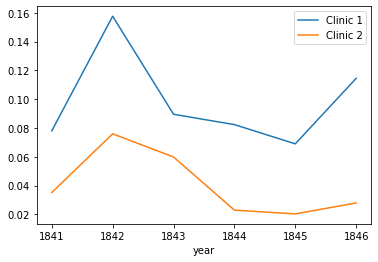

In [36]:
# Display plot in notebook
%matplotlib inline

ax1 = clinic_1.plot(x="year", y="deaths_proportion", label="Clinic 1")
clinic_2.plot(x="year", y="deaths_proportion", ax = ax1, label="Clinic 2")

plt.legend()
plt.show()

As you can see that the proportion of deaths is consistently higher on Clinic 1. The problem is that most of medical students served at clinic 1 also spent time in the autopsy rooms examining corpes, while mostly midwife student served at clinic 2 only deal with women giving birth.

Semmelweis started to suspect that something on the corpses may spread from the hands of medical students that caused childbed fever. So to decrease the high mortality rates, Semmelweis made an regulation of handwashing. 

Now we'll see if the handwashing regulation had any effect of decreasing mortality rates by checking on 'monthly' data.

In [37]:
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [38]:
# Calculate monthly deaths proportion
monthly['deaths_proportion'] = monthly['deaths']/monthly['births']
monthly

,date,births,deaths,deaths_proportion
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


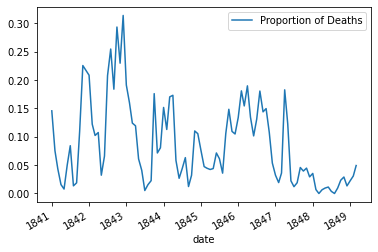

In [39]:
# Plot monthly deaths proportion
monthly.plot(x = 'date', y = 'deaths_proportion', label = 'Proportion of Deaths')

In the mid 1847, the proportions of death is drastically reduced. This is was when Semmelweis made handwashing obligatory.

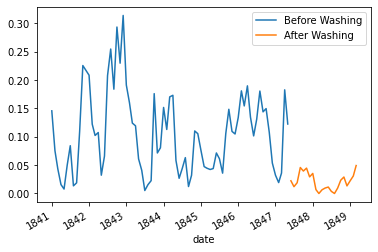

In [40]:
handwashing_start = pd.to_datetime('1847-06-01')

before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot deaths proportion before and after hand washing obligatory
ax1 = before_washing.plot(x="date", y="deaths_proportion", label="Before Washing")
after_washing.plot(x="date", y="deaths_proportion", ax = ax1, label="After Washing")


The graph above shows that the obligatory of handwashing had a huge effect. Let's calculate the differences before and after.

In [41]:
# Calculate mean deaths proportion differences
before_deaths_proportion = before_washing['deaths_proportion']
after_deaths_proportion = after_washing['deaths_proportion']
mean_different = after_deaths_proportion.mean() - before_deaths_proportion.mean()
mean_different

-0.0839566075118334

# Bootstrap analysis

It reduced the proportion of deaths by around 8 percentage point. From 10% to just 2%.

Now we perform bootstrap method to calcualte 95% confidence interval 

In [42]:
# Bootstrap Distribution
bootstrap_mean_diff = []
for i in range(3000):
    bootstrap_before = before_washing['deaths_proportion'].sample(frac = 1, replace = True)
    bootstrap_after = after_washing['deaths_proportion'].sample(frac = 1, replace = True)
    bootstrap_mean_diff.append(bootstrap_after.mean() - bootstrap_before.mean())

# Calculating confidence interval 95%
confidence_interval = pd.Series(bootstrap_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101207
0.975   -0.067446
dtype: float64

# Conclussion

The handwashing obligatory reduced the proportion of deaths between 6.7 and 10 persentage point according to 95% confidence interval. Seems that Semmelweis had a solid evidence that handwashing was a simple but effective procedure that could save many lives.

So, doctor should wash their hands!